# BinaryMask to Shape File - simple example

## Development version

This notebook illustrates the conversion of a toy example binary mask to a shapefile.

### Generate simple binary mask.

Python packages import.

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import pprint
from rasterio.features import shapes as sh
from shapely.geometry import MultiPolygon, shape, mapping
from satsense.util.shapefile import show_multipolygon as shmp # visualization of multipolygons
import fiona as f

Generate a simple binary mask as numpy array and display it.

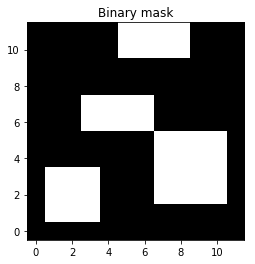

In [49]:
binary_mask = np.zeros((12, 12), dtype=np.uint8)
binary_mask[1:4,1:4] = 1
binary_mask[2:6,7:11] = 1
binary_mask[10:12,5:9] = 1
binary_mask[6:8,3:7] = 1

plt.imshow(binary_mask, cmap='gray', origin = 'lower')
plt.title('Binary mask')

### Converting binary mask to shapes with default connectivity (4) and image coordinates.

In [50]:
results = (
    {'properties': {'raster_val': v}, 'geometry': s}
    for i, (s, v) 
    in enumerate(
        sh(binary_mask, mask=binary_mask)))
geoms4 = list(results)    
print("Number of polygons:", len(geoms4))
pprint.pprint(geoms4)
multi4 = MultiPolygon([shape(geoms4[i]['geometry']) for i in range (len(geoms4))])
print(multi4.is_valid)

Number of polygons: 4
[{'geometry': {'coordinates': [[(1.0, 1.0),
                                (1.0, 4.0),
                                (4.0, 4.0),
                                (4.0, 1.0),
                                (1.0, 1.0)]],
               'type': 'Polygon'},
  'properties': {'raster_val': 1.0}},
 {'geometry': {'coordinates': [[(7.0, 2.0),
                                (7.0, 6.0),
                                (11.0, 6.0),
                                (11.0, 2.0),
                                (7.0, 2.0)]],
               'type': 'Polygon'},
  'properties': {'raster_val': 1.0}},
 {'geometry': {'coordinates': [[(3.0, 6.0),
                                (3.0, 8.0),
                                (7.0, 8.0),
                                (7.0, 6.0),
                                (3.0, 6.0)]],
               'type': 'Polygon'},
  'properties': {'raster_val': 1.0}},
 {'geometry': {'coordinates': [[(5.0, 10.0),
                                (5.0, 12.0),
 

Visualize:

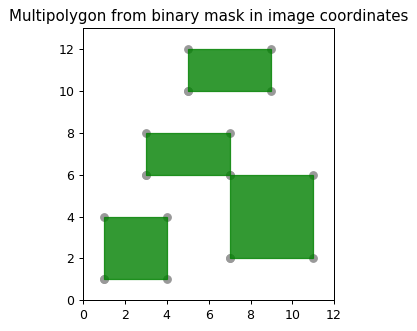

In [51]:
GREEN = '#008000'
offset = 1
al = 0.8
xmin, ymin, xmax, ymax = multi4.bounds
extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset

fig = plt.figure(1, dpi=90)

ax = fig.add_subplot(111)

shmp(multi4, ax, True, extent, GREEN, al, 'Multipolygon from binary mask in image coordinates') 

### Converting binary mask to shapes with connectivity 8 and world coordinates.

Set an example world coordinates transform.

In [52]:
t = [101985.0, 300.0379266750948, 0.0,
     2826915.0, 0.0, -300.041782729805]

In [53]:
results = (
    {'properties': {'raster_val': v}, 'geometry': s}
    for i, (s, v) 
    in enumerate(
        sh(binary_mask, mask=binary_mask, connectivity = 8, transform=t)))
geoms8 = list(results)    
print("Number of polygons:", len(geoms8))
pprint.pprint(geoms8)

Number of polygons: 3
[{'geometry': {'coordinates': [[(102285.0379266751, 2826614.95821727),
                                (102285.0379266751, 2825714.832869081),
                                (103185.15170670037, 2825714.832869081),
                                (103185.15170670037, 2826614.95821727),
                                (102285.0379266751, 2826614.95821727)]],
               'type': 'Polygon'},
  'properties': {'raster_val': 1.0}},
 {'geometry': {'coordinates': [[(104085.26548672566, 2826314.9164345404),
                                (104085.26548672566, 2825114.7493036212),
                                (103785.22756005057, 2825114.7493036212),
                                (102885.11378002529, 2825114.7493036212),
                                (102885.11378002529, 2824514.6657381617),
                                (104085.26548672566, 2824514.6657381617),
                                (104085.26548672566, 2825114.7493036212),
                          

/home/elena/anaconda3/envs/satelite/lib/python3.5/site-packages/rasterio/features.py:102: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


Convert the polygons to shapely multi-polygon.

In [54]:
multi8 = MultiPolygon([shape(geoms8[i]['geometry']) for i in range (len(geoms8))])
print(multi8.is_valid)

Ring Self-intersection at or near point 104085.26548672566 2825114.7493036212


False


### Generate valid shapely multipolygon from raster

In [55]:
results = (
    {'properties': {'raster_val': v}, 'geometry': s}
    for i, (s, v) 
    in enumerate(
        sh(binary_mask, mask=binary_mask, transform=t)))
geoms4w = list(results)    
print("Number of polygons:", len(geoms4w))
multi4 = MultiPolygon([shape(geoms4w[i]['geometry']) for i in range (len(geoms4w))])
print(multi4.is_valid)
#print(multi4)


Number of polygons: 4
True
MULTIPOLYGON (((102285.0379266751 2826614.95821727, 102285.0379266751 2825714.832869081, 103185.1517067004 2825714.832869081, 103185.1517067004 2826614.95821727, 102285.0379266751 2826614.95821727)), ((104085.2654867257 2826314.91643454, 104085.2654867257 2825114.749303621, 105285.417193426 2825114.749303621, 105285.417193426 2826314.91643454, 104085.2654867257 2826314.91643454)), ((102885.1137800253 2825114.749303621, 102885.1137800253 2824514.665738162, 104085.2654867257 2824514.665738162, 104085.2654867257 2825114.749303621, 102885.1137800253 2825114.749303621)), ((103485.1896333755 2823914.582172702, 103485.1896333755 2823314.498607242, 104685.3413400759 2823314.498607242, 104685.3413400759 2823914.582172702, 103485.1896333755 2823914.582172702)))


/home/elena/anaconda3/envs/satelite/lib/python3.5/site-packages/rasterio/features.py:102: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


Display the multipolygon.

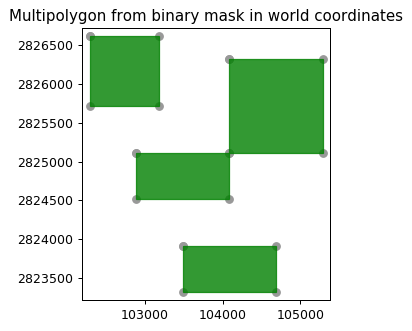

In [56]:
GREEN = '#008000'
offset = 100
al = 0.8
xmin, ymin, xmax, ymax = multi4.bounds
extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset

fig = plt.figure(1, dpi=90)

ax = fig.add_subplot(111)

shmp(multi4, ax, True, extent, GREEN, al, 'Multipolygon from binary mask in world coordinates')  

### Saving the shapely multipolygon in a shapefile

In [57]:
# path
path = '/home/elena/DynaSlum/Data/misc/'

# filename
ext = 'shp'
fname = 'rectangles' + '.' + ext

# full filename
fullfname = os.path.join(path, fname)

Saving the multipolygon as a single feature.

In [58]:
 # Define a multipolygon feature geometry with one attribute
schema = {
#    'geometry': 'MultiPolygon',
#    'properties': {'id': 'str'},
    'geometry': 'Polygon',
    'properties': {'id': 'int'},

}

# Write a new Shapefile
i = 0
with f.open(fullfname, 'w', 'ESRI Shapefile', schema) as fp:
    for poly in multi4:
        i = i+1
        fp.write({
            'geometry': mapping(poly),
            'properties': {'id': i},
        })